In [11]:
import numpy as np
import pandas as pd 

In [12]:
df = pd.read_csv("/kaggle/input/linearregression/Data3.csv")
df.rename(columns={'z':'y'},inplace = True)
df

,x,y
0,0.1,1.159563
1,0.2,1.002381
2,0.3,0.935920
3,0.4,0.016261
4,0.5,1.172652
...,...,...
95,9.6,2.267108
96,9.7,2.351145
97,9.8,1.957880
98,9.9,1.426106


In [13]:
y = df['y']
y_array = np.array(y)
df = df.drop(columns='y')

In [14]:
A = np.zeros((1,1))
for i in range(len(df)):
    temp = np.array(df.iloc[i])
    x1 = temp.reshape((1,1))
    x2 = x1.T
    A+= x1@x2


In [15]:
A_inverse = np.linalg.inv(A)
A_inverse 

array([[0.00029555]])

In [16]:
sigma_yi_xi = np.zeros((1,1))

for i in range(len(df)):
    temp = np.array(df.iloc[i])
    x1 = temp.reshape((1,1))
    x2 = y_array[i].reshape((1,1))
    sigma_yi_xi+= x1*x2
print(sigma_yi_xi)

[[913.10893912]]


In [17]:
w = A_inverse@sigma_yi_xi
w

array([[0.26987112]])

In [19]:
c = 0.5
lst = []
for i in range(len(df)):
    lst.append(w.T@np.array(df.iloc[i][:] + c))
lst


[array([0.16192267]),
 array([0.18890978]),
 array([0.2158969]),
 array([0.24288401]),
 array([0.26987112]),
 array([0.29685823]),
 array([0.32384535]),
 array([0.35083246]),
 array([0.37781957]),
 array([0.40480668]),
 array([0.43179379]),
 array([0.45878091]),
 array([0.48576802]),
 array([0.51275513]),
 array([0.53974224]),
 array([0.56672935]),
 array([0.59371647]),
 array([0.62070358]),
 array([0.64769069]),
 array([0.6746778]),
 array([0.70166492]),
 array([0.72865203]),
 array([0.75563914]),
 array([0.78262625]),
 array([0.80961336]),
 array([0.83660048]),
 array([0.86358759]),
 array([0.8905747]),
 array([0.91756181]),
 array([0.94454892]),
 array([0.97153604]),
 array([0.99852315]),
 array([1.02551026]),
 array([1.05249737]),
 array([1.07948449]),
 array([1.1064716]),
 array([1.13345871]),
 array([1.16044582]),
 array([1.18743293]),
 array([1.21442005]),
 array([1.24140716]),
 array([1.26839427]),
 array([1.29538138]),
 array([1.32236849]),
 array([1.34935561]),
 array([1.3763

In [21]:
df['y_hat'] = lst
df['y'] = y_array

In [22]:
def R_square(df):
    return 1 - RSS(df)/TSS(df)
def RSS(df):
    return np.sum((df['y']-df['y_hat'])**2)
def TSS(df):
    return np.sum((df['y']-np.mean(df['y_hat']))**2)


In [23]:
R_square(df)

array([-0.70572247])

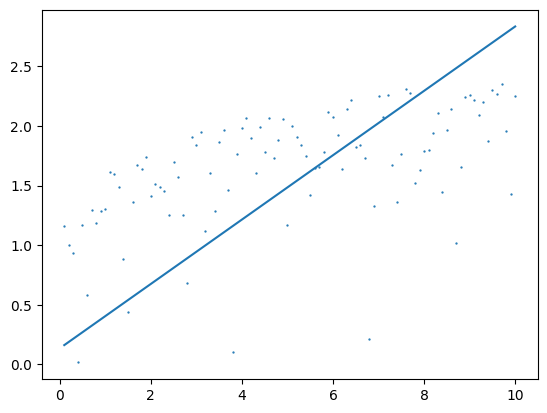

In [24]:
import matplotlib.pyplot as plt
x_list = [float(i) for i in df['x']]
y_list = [float(i) for i in df['y']]
plt.scatter(x_list, y_list,s=0.4)
plt.plot(x_list, df['y_hat'])
plt.show()

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()

In [26]:
df
x = df[['x']]
y = df['y']
lr.fit(x,df['y'])

LinearRegression()

In [27]:
y_hat = lr.predict(x)
r_square = r2_score(y,y_hat)
print(r_square)

0.3136973226728079


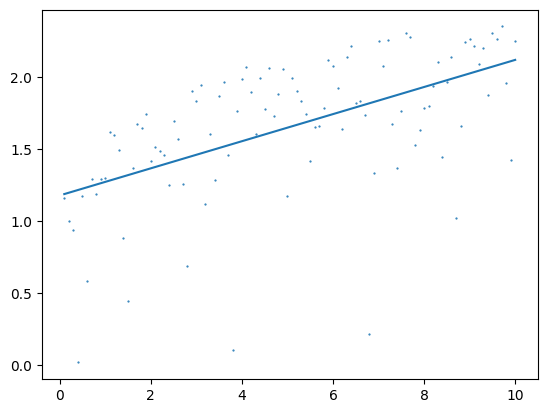

In [28]:
x_list = [float(i) for i in df['x']]
y_list = [float(i) for i in df['y']]
plt.scatter(x_list, y_list,s=0.3)
plt.plot(x_list, y_hat)
plt.show()